**Aluno:** Giovanni Martins de Sá Júnior - 2017001850

**Disciplina:** Otimização (ELE037) - Rodney Rezende Saldanha

# Estudo e o desenvolvimento de uma ferramenta computacional baseada no Algoritmo Genético

Para o desenvolvimento deste trabalho, será desenvolvido um estudo sobre a aplicação de algoritmos genéticos utilizando o uso de inteligência computacional. Diante deste cenário, a definição de determinados parâmetros é fundamental para a delimitação do problema a ser resolvido.

Abaixo são listados alguns dos principais parâmetros avaliados no desenvolvimento deste trabalho:

- **População inicial:** A população inicial representa o conjunto de indivíduos que são possíveis candidatos para a solução do problema em questão. A escolha da população é fundamental, uma vez que ela delimita a diversidade genética e a capacidade do algoritmo explorar o espaço de busca.

- **Decodificação:** No contexto de algoritmos genéticos, a decodificação envolve a representação de cromossomos de um indivíduo(sendo aqui, representado por uma sequência de bits. Assim, o objetivo final é executar o mapeamento de um cromossomo no intuito de avaliar a sua qualidade.

- **Avaliação e o *fitness*:** A etapa de avaliação é muito importante, uma vez que determina a qualidade de cada indivíduo em relação ao problema em questão. Com isso a função de *fitness* é projetada segundo a natureza do problema, sendo utilizado, por exemplo, para minimização ou maximização de uma métrica avaliada. Assim, ela tem uma grande capacidade de avaliação de distinção de indivíduos de baixa e alta qualidade. Além disso, ela precisa ser calculada de forma eficiente, para que não se torne um gargalo no processo de evolução.

- **Cruzamento:** o cruzamento envolve a combinqção de informações genéticas de dois ou mais pais com o intuito de gerar descendentes que possuam características favoráveis que ambos os progenitores, tal como ocorre na reprodução sexual. Assim, o objetivo desta etapa é explorar a combinação de informações genéticas dos pais para produzir descendentes com características favoráveis.

- **Mutação:** outra operação fundamental em algoritmos genéticos, a mutação introduz diversidade na população, realizando pequenas alterações genéticas que ocorrem na natureza, contribuindo para a variabilidade genética. Ela efetua um papel fundamental no processo de busca, pois permite que explorar regiões do espaço que o próprio cruzamento não conseguiria executar. Assim, mesmo que os pais sejam bem-sucedidos na produção de descendentes promissores, a motução introduz novas características ou corrige possíveis erros do cruzamento.

- **Elitismo:** O elitismo envolve uma etapa interessante na preservação das melhores soluções encontradas ao longo das gerações. Assim, ela envolve a preservação dos melhores candidatos, e transferí-los diretamente para as próximas gerações sem efetuar qualquer altação. Assim, garante-se que as soluções mais promissoras não sejam perdidas no processo de evolução. 

A partir da explicação destes parâmetros, serão buscadas as melhores soluções por meio da variação destas variáveis. Para a resolução deste trabalho, serão explorados mais adiante os intervalos mínimos e máximos, em cima da **variação das funções objetivos**, sendo elas as funções de Picos, Ackley, e Rastrigin. Logo abaixo, são delimitados os limites para cada parâmetro esclarecido acima.

Parâmetro   | Valor / Opção 
--------- | ------
Tamanho da população | 10 - 100
Tamanho do cromossomo | 10 - 35
Número máximo de gerações | 10 - 50
Taxa de cruzamento | 60 - 80%
Taxa de mutação | 1 - 5%
Taxa de elitismo | 55 - 75%
Função Fitness | Minizar ou maximizar

## Implementação inicial

- Desenvolvimento das funções iniciais para o desenvolvimento do trabalho:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Função para calcular o fitness de um indivíduo
def calculate_fitness(individual):
    x = decode(individual[:chromosome_size // 2], x_min, x_max)
    y = decode(individual[chromosome_size // 2:], y_min, y_max)
    return peaks_function(x, y)

# Função para decodificar um cromossomo
def decode(chromosome, min_value, max_value):
    n = len(chromosome)
    k = np.ceil(np.log2((max_value - min_value) * 10))
    x = sum(2**i for i, bit in enumerate(chromosome) if bit)
    return x * ((np.abs(min_value - max_value)) / (2**n - 1)) + min_value

def roulette_wheel_selection(population, fitness_scores):
    total_fitness = np.sum(fitness_scores)
    if total_fitness == 0:
        probabilities = np.ones(len(fitness_scores)) / len(fitness_scores)  # Probabilidade uniforme se total_fitness for zero
    else:
        probabilities = fitness_scores / total_fitness
    probabilities = np.clip(probabilities, 0, 1)  # Garante que as probabilidades estejam entre 0 e 1
    probabilities /= np.sum(probabilities)  # Normaliza as probabilidades para que a soma seja 1
    selected_index = np.random.choice(len(population), p=probabilities)
    return population[selected_index]
    
# Função para cruzamento (crossover)
def crossover(parent1, parent2, crossover_rate):
    if np.random.rand() < crossover_rate:
        crossover_point = np.random.randint(1, len(parent1))
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2
    else:
        return parent1, parent2

# Função para mutação
def mutate(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip the bit
    return individual

## Função Picos

A função picos recebe como entrada um vetor de valores, onde cada valor representa uma dimensão no espaço de busca. O objetivo é encontrar o ponto do espaço de busca que maximize (ou minimize) o valor da função.
Assim, ele apresenta uma paisagem com várias "colinas" e "vales" (picos), onde cada colina representa um ponto de máximo local. O objetivo é encontrar o pico mais alto (ou mínimo, dependendo do problema) em meio a essas colinas e vales.

A dificuldade da função picos reside na presença de múltiplos picos, o que pode levar os algoritmos de otimização a ficarem presos em máximos locais, em vez de alcançar o máximo global.

In [3]:
# Função de avaliação - Peaks Function
def peaks_function(x, y):
    return 3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - (1/3)*np.exp(-(x+1)**2 - y**2)

### Intervalo mínimo

Ao utilizar parâmetros mínimos na função de picos, os desafios da função se tornam mais evidentes e pronunciados. Com parâmetros mínimos, o número de picos é reduzido, tornando a função menos complexa, como pode ser visto logo abaixo.

In [4]:
# Parâmetros do algoritmo genético
population_size = 10
chromosome_size = 10
max_generations = 10
crossover_rate = 0.6
mutation_rate = 0.01
elitism_rate = 0.55

x_min, x_max = -3, 3
y_min, y_max = -3, 3

# Inicialização da população
population = np.random.randint(2, size=(population_size, chromosome_size))

In [5]:
# Loop principal do algoritmo genético
for generation in range(max_generations):
    # Avaliação da população
    fitness_scores = np.array([calculate_fitness(individual) for individual in population])

    # Seleção dos pais
    selected_parents = [roulette_wheel_selection(population, fitness_scores) for _ in range(population_size)]

    # Cruzamento (crossover) e mutação
    offspring = []
    for i in range(0, population_size, 2):
        child1, child2 = crossover(selected_parents[i], selected_parents[i + 1], crossover_rate)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        offspring.append(child1)
        offspring.append(child2)

    # Elitismo
    elite_size = int(elitism_rate * population_size)
    elite_indices = np.argsort(fitness_scores)[::-1][:elite_size]
    elite = population[elite_indices]

    # Substituição da população
    population = np.vstack((elite, offspring[:population_size - elite_size]))

    # Mostrar o melhor fitness da geração atual
    best_fitness = np.max(fitness_scores)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

Generation 1: Best Fitness = 2.3091414782772954
Generation 2: Best Fitness = 2.3091414782772954
Generation 3: Best Fitness = 3.1655433966316266
Generation 4: Best Fitness = 3.1655433966316266
Generation 5: Best Fitness = 3.1655433966316266
Generation 6: Best Fitness = 3.1655433966316266
Generation 7: Best Fitness = 3.5503210274367922
Generation 8: Best Fitness = 3.5503210274367922
Generation 9: Best Fitness = 3.5503210274367922
Generation 10: Best Fitness = 3.5503210274367922


In [6]:
# Avaliação final
final_fitness_scores = np.array([calculate_fitness(individual) for individual in population])
best_individual_index = np.argmax(final_fitness_scores)
best_individual = population[best_individual_index]
best_x = decode(best_individual[:chromosome_size // 2], x_min, x_max)
best_y = decode(best_individual[chromosome_size // 2:], y_min, y_max)
print("\nResultado final:")
print(f"Melhor Indivíduo: {best_individual}")
print(f"Melhor Fitness: {final_fitness_scores[best_individual_index]}")
print(f"Melhor x: {best_x}")
print(f"Melhor y: {best_y}")


Resultado final:
Melhor Indivíduo: [0 1 1 0 1 0 0 0 0 1]
Melhor Fitness: 3.5503210274367922
Melhor x: 1.258064516129032
Melhor y: 0.09677419354838701


In [7]:
# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

In [8]:
# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calculando os valores da função de pico para cada par de coordenadas (x, y)
Z = peaks_function(X, Y)

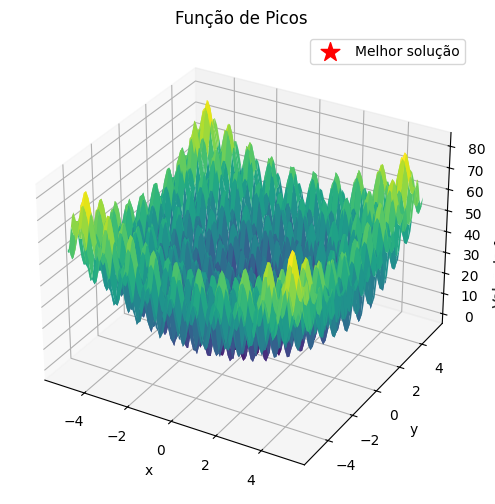

In [41]:
# Plotando o gráfico da função Peaks em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(best_x, best_y, peaks_function(best_x, best_y), color='red', marker='*', s=200, label='Melhor solução')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Valor da função de PIcos')
ax.set_title('Função de Picos')
plt.legend()
plt.show()

### Intervalo máximo

Ao invertermos para os parâmetros máximos na função de picos, ocorre uma expansão significativa da complexidade da função. Com parâmetros máximos, o número de picos tende a aumentar, criando um ambiente de busca mais difícil. Abaixo, é listado o resultado.

In [10]:
# Parâmetros do algoritmo genético
population_size = 100
chromosome_size = 35
max_generations = 50
crossover_rate = 0.8
mutation_rate = 0.05
elitism_rate = 0.75

x_min, x_max = -3, 3
y_min, y_max = -3, 3

# Inicialização da população
population = np.random.randint(2, size=(population_size, chromosome_size))

In [11]:
# Loop principal do algoritmo genético
for generation in range(max_generations):
    # Avaliação da população
    fitness_scores = np.array([calculate_fitness(individual) for individual in population])

    # Seleção dos pais
    selected_parents = [roulette_wheel_selection(population, fitness_scores) for _ in range(population_size)]

    # Cruzamento (crossover) e mutação
    offspring = []
    for i in range(0, population_size, 2):
        child1, child2 = crossover(selected_parents[i], selected_parents[i + 1], crossover_rate)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        offspring.append(child1)
        offspring.append(child2)

    # Elitismo
    elite_size = int(elitism_rate * population_size)
    elite_indices = np.argsort(fitness_scores)[::-1][:elite_size]
    elite = population[elite_indices]

    # Substituição da população
    population = np.vstack((elite, offspring[:population_size - elite_size]))

    # Mostrar o melhor fitness da geração atual
    best_fitness = np.max(fitness_scores)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

Generation 1: Best Fitness = 6.831124846818356
Generation 2: Best Fitness = 5.827808833125316
Generation 3: Best Fitness = 6.732600993587485
Generation 4: Best Fitness = 6.912736977457391
Generation 5: Best Fitness = 6.912736977457391
Generation 6: Best Fitness = 7.231317581375788
Generation 7: Best Fitness = 7.231317581375788
Generation 8: Best Fitness = 6.9352346005843195
Generation 9: Best Fitness = 7.708403969132077
Generation 10: Best Fitness = 7.708403969132077
Generation 11: Best Fitness = 7.708403969132077
Generation 12: Best Fitness = 7.708403969132077
Generation 13: Best Fitness = 7.708403969132077
Generation 14: Best Fitness = 7.708403969132077
Generation 15: Best Fitness = 7.819318128864221
Generation 16: Best Fitness = 7.819318128864221
Generation 17: Best Fitness = 7.823632315393697
Generation 18: Best Fitness = 7.946672272624265
Generation 19: Best Fitness = 7.9833788209029155
Generation 20: Best Fitness = 7.9833788209029155
Generation 21: Best Fitness = 7.98337882090291

In [12]:
# Avaliação final
final_fitness_scores = np.array([calculate_fitness(individual) for individual in population])
best_individual_index = np.argmax(final_fitness_scores)
best_individual = population[best_individual_index]
best_x = decode(best_individual[:chromosome_size // 2], x_min, x_max)
best_y = decode(best_individual[chromosome_size // 2:], y_min, y_max)
print("\nFinal Result:")
print(f"Melhor Indivíduo: {best_individual}")
print(f"Melhor Fitness: {final_fitness_scores[best_individual_index]}")
print(f"Melhor x: {best_x}")
print(f"Melhor y: {best_y}")


Final Result:
Melhor Indivíduo: [0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
Melhor Fitness: 7.995524545743043
Melhor x: -0.026619160607609604
Melhor y: 1.4997653952232177


In [13]:
# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

In [14]:
# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calculando os valores da função de pico para cada par de coordenadas (x, y)
Z = peaks_function(X, Y)

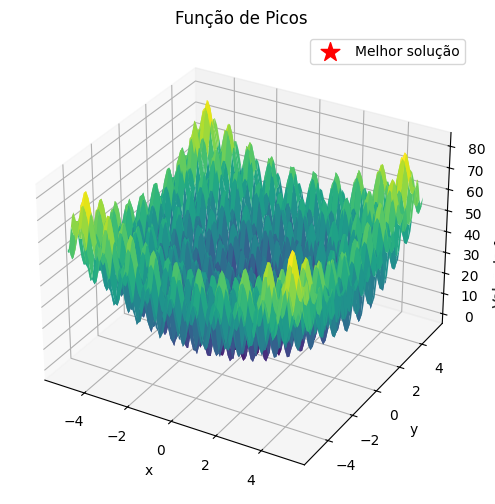

In [42]:
# Plotando o gráfico da função Peaks em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(best_x, best_y, peaks_function(best_x, best_y), color='red', marker='*', s=200, label='Melhor solução')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Valor da função de Picos')
ax.set_title('Função de Picos')
plt.legend()
plt.show()

## Função Ackley

A função Ackley é uma função de teste por apresentar algumas características desafiadoras. Dentre as suas características podem ser citadas:

- **Multi-modularidade:** Possui múltiplos mínimos locais, tornando a busca pelo mínimo global mais difícil.
- **Planícies:** Possui planícies amplas em torno dos mínimos locais, onde o valor da função é quase constante. Isso pode fazer com que os algoritmos de otimização fiquem presos nessas regiões se não forem capazes de explorar efetivamente o espaço de busca.
- **Escalonamento:** A presença de uma exponencial negativa amplifica o efeito das variáveis de decisão, exigindo uma ampla exploração do espaço de busca.

In [16]:
# Função de avaliação - Ackley Function
def ackley_function(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return term1 + term2 + a + np.exp(1)

# Função para decodificar um cromossomo
def decode(chromosome, min_value, max_value):
    n = len(chromosome)
    x = sum(2**i for i, bit in enumerate(chromosome) if bit)
    return x * ((np.abs(min_value - max_value)) / (2**n - 1)) + min_value

### Intervalo mínimo

Ao se adotar parâmetros mínimos para a função Ackley, os valores dos parâmetros que controlam a amplitude e a largura dos picos e vales na função são reduzidos. Isso resulta em uma função Ackley com menos oscilações e variações, criando um espaço de busca menos complexo e mais suave.

Com parâmetros mínimos na função Ackley, os picos e vales são menos acentuados, o que facilita a convergência de algoritmos de otimização para o mínimo global. Menos oscilações na função significam que os algoritmos têm menos obstáculos para superar durante a busca pela solução ótima.

In [17]:
# Parâmetros do algoritmo genético
population_size = 10
chromosome_size = 10
max_generations = 10
crossover_rate = 0.6
mutation_rate = 0.01
elitism_rate = 0.55

x_min, x_max = -35, 35
y_min, y_max = -35, 35

# Inicialização da população
population = np.random.randint(2, size=(population_size, chromosome_size))

In [18]:
# Loop principal do algoritmo genético
for generation in range(max_generations):
    # Avaliação da população
    fitness_scores = np.array([calculate_fitness(individual) for individual in population])

    # Seleção dos pais
    selected_parents = [roulette_wheel_selection(population, fitness_scores) for _ in range(population_size)]

    # Cruzamento (crossover) e mutação
    offspring = []
    for i in range(0, population_size, 2):
        child1, child2 = crossover(selected_parents[i], selected_parents[i + 1], crossover_rate)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        offspring.append(child1)
        offspring.append(child2)

    # Elitismo
    elite_size = int(elitism_rate * population_size)
    elite_indices = np.argsort(fitness_scores)[::-1][:elite_size]
    elite = population[elite_indices]

    # Substituição da população
    population = np.vstack((elite, offspring[:population_size - elite_size]))

    # Mostrar o melhor fitness da geração atual
    best_fitness = np.max(fitness_scores)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

Generation 1: Best Fitness = 7.306281397517651e-12
Generation 2: Best Fitness = 7.306281397517651e-12
Generation 3: Best Fitness = 7.306281397517651e-12
Generation 4: Best Fitness = 7.306281397517651e-12
Generation 5: Best Fitness = 7.306281397517651e-12
Generation 6: Best Fitness = 7.306281397517651e-12
Generation 7: Best Fitness = 7.306281397517651e-12
Generation 8: Best Fitness = 7.306281397517651e-12
Generation 9: Best Fitness = 7.306281397517651e-12
Generation 10: Best Fitness = 0.013010841519854937


In [19]:
# Avaliação final
final_fitness_scores = np.array([calculate_fitness(individual) for individual in population])
best_individual_index = np.argmax(final_fitness_scores)
best_individual = population[best_individual_index]
best_x = decode(best_individual[:chromosome_size // 2], x_min, x_max)
best_y = decode(best_individual[chromosome_size // 2:], y_min, y_max)
print("\nFinal Result:")
print(f"Melhor Indivíduo: {best_individual}")
print(f"Melhor Fitness: {final_fitness_scores[best_individual_index]}")
print(f"Melhor x: {best_x}")
print(f"Melhor y: {best_y}")


Final Result:
Melhor Indivíduo: [0 0 0 0 1 1 0 0 0 1]
Melhor Fitness: 0.013010841519854937
Melhor x: 1.1290322580645196
Melhor y: 3.3870967741935516


In [20]:
# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calculando os valores da função de Ackley para cada par de coordenadas (x, y)
Z = ackley_function(X, Y)

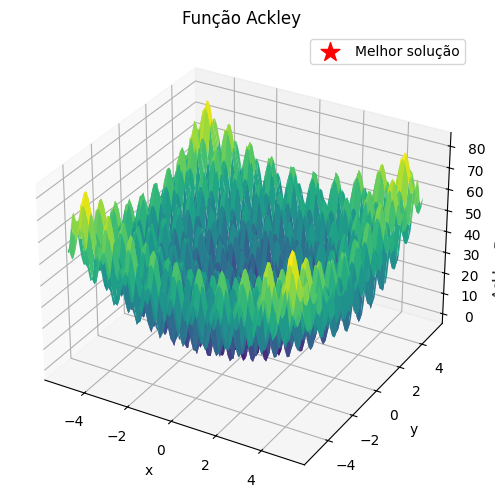

In [43]:
# Plotando o gráfico da função Ackley em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(best_x, best_y, ackley_function(best_x, best_y), color='red', marker='*', s=200, label='Melhor solução')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Ackley Function Value')
ax.set_title('Função Ackley')
plt.legend()
plt.show()

### Intervalo máximo

Ao se adotar um intervalo máximo na função de Ackley, os valores dos parâmetros que definem a amplitude e a largura dos picos e vales na função são aumentados. Isso resulta em uma função Ackley com mais oscilações e variações, criando um espaço de busca mais complexo e desafiador.

Com um intervalo máximo na função de Ackley, os picos e vales são mais acentuados, o que dificulta a convergência de algoritmos de otimização para o mínimo global. Mais oscilações na função significam que os algoritmos enfrentam mais obstáculos durante a busca pela solução ótima, tornando o processo de otimização mais desafiador.

In [22]:
# Parâmetros do algoritmo genético
population_size = 100
chromosome_size = 35
max_generations = 50
crossover_rate = 0.8
mutation_rate = 0.05
elitism_rate = 0.75

x_min, x_max = -35, 35
y_min, y_max = -35, 35

# Inicialização da população
population = np.random.randint(2, size=(population_size, chromosome_size))

In [23]:
# Loop principal do algoritmo genético
for generation in range(max_generations):
    # Avaliação da população
    fitness_scores = np.array([calculate_fitness(individual) for individual in population])

    # Seleção dos pais
    selected_parents = [roulette_wheel_selection(population, fitness_scores) for _ in range(population_size)]

    # Cruzamento (crossover) e mutação
    offspring = []
    for i in range(0, population_size, 2):
        child1, child2 = crossover(selected_parents[i], selected_parents[i + 1], crossover_rate)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        offspring.append(child1)
        offspring.append(child2)

    # Elitismo
    elite_size = int(elitism_rate * population_size)
    elite_indices = np.argsort(fitness_scores)[::-1][:elite_size]
    elite = population[elite_indices]

    # Substituição da população
    population = np.vstack((elite, offspring[:population_size - elite_size]))

    # Mostrar o melhor fitness da geração atual
    best_fitness = np.max(fitness_scores)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

Generation 1: Best Fitness = 1.2443467942466198e-06
Generation 2: Best Fitness = 0.0021541542136753323
Generation 3: Best Fitness = 1.371693983883094e-05
Generation 4: Best Fitness = 1.9041293858694333
Generation 5: Best Fitness = 3.4630794719586317
Generation 6: Best Fitness = 3.674898921175566
Generation 7: Best Fitness = 3.5060182131620805
Generation 8: Best Fitness = 3.6177909007969067
Generation 9: Best Fitness = 3.6846566980657145
Generation 10: Best Fitness = 3.5968207471164093
Generation 11: Best Fitness = 3.5968207471164093
Generation 12: Best Fitness = 3.618938753796361
Generation 13: Best Fitness = 3.620489413388425
Generation 14: Best Fitness = 3.561862551603715
Generation 15: Best Fitness = 3.690054384807027
Generation 16: Best Fitness = 3.690054384807027
Generation 17: Best Fitness = 3.690054384807027
Generation 18: Best Fitness = 3.744433810458747
Generation 19: Best Fitness = 3.6919636636689352
Generation 20: Best Fitness = 3.5967463650910423
Generation 21: Best Fitness

In [24]:
# Avaliação final
final_fitness_scores = np.array([calculate_fitness(individual) for individual in population])
best_individual_index = np.argmax(final_fitness_scores)
best_individual = population[best_individual_index]
best_x = decode(best_individual[:chromosome_size // 2], x_min, x_max)
best_y = decode(best_individual[chromosome_size // 2:], y_min, y_max)
print("\nFinal Result:")
print(f"Melhor Indivíduo: {best_individual}")
print(f"Melhor Fitness: {final_fitness_scores[best_individual_index]}")
print(f"Melhor x: {best_x}")
print(f"Melhor y: {best_y}")


Final Result:
Melhor Indivíduo: [0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0]
Melhor Fitness: 3.7739481196553872
Melhor x: -0.46116227083031447
Melhor y: -0.644743517850948


In [25]:
# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calculando os valores da função de Ackley para cada par de coordenadas (x, y)
Z = ackley_function(X, Y)

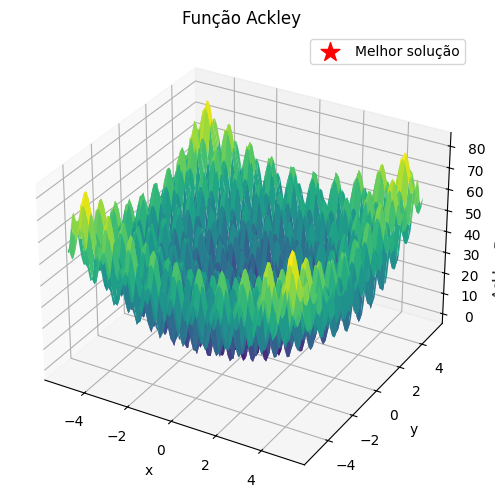

In [44]:
# Plotando o gráfico da função Ackley em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(best_x, best_y, ackley_function(best_x, best_y), color='red', marker='*', s=200, label='Melhor solução')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Ackley Function Value')
ax.set_title('Função Ackley')
plt.legend()
plt.show()

## Função Rastrigin

A função de Rastrigin é outra função particularmente muito interessante em problemas de otimização dada a sua complexidade e não linearidade. Dentre as suas características, podem ser listadas:

- **Multi-modularidade:** Assim como a função Ackley, a função Rastrigin possui múltiplos mínimos locais, o que torna a busca pelo mínimo global mais difícil.
- **Oscilações rápidas:** A presença de termos trigonométricos na função causa oscilações rápidas que podem dificultar a convergência de algoritmos de otimização.
- **Dimensionalidade:** A função Rastrigin é sensível à dimensionalidade, o que significa que sua complexidade aumenta exponencialmente com o número de variáveis de decisão. Isso torna a busca pelo mínimo global mais desafiadora à medida que o espaço de busca se expande.

In [27]:
# Função de avaliação - Rastrigin Function
def rastrigin_function(x, y):
    A = 10
    return 2 * A + x**2 - A * np.cos(2 * np.pi * x) + y**2 - A * np.cos(2 * np.pi * y)

### Intervalo mínimo

Ao utilizar um intervalo mínimo na função de Rastrigin, os valores dos parâmetros que controlam a amplitude e a largura das oscilações na função são reduzidos. Isso resulta em uma função de Rastrigin com menos oscilações e variações, criando um espaço de busca menos complexo e mais suave.

Com um intervalo mínimo na função de Rastrigin, as oscilações são menos acentuadas, o que facilita a convergência de algoritmos de otimização para o mínimo global. Menos oscilações na função significam que os algoritmos têm menos obstáculos para superar durante a busca pela solução ótima.

In [28]:
# Parâmetros do algoritmo genético
population_size = 10
chromosome_size = 10
max_generations = 10
crossover_rate = 0.6
mutation_rate = 0.01
elitism_rate = 0.55

x_min, x_max = -5.12, 5.12
y_min, y_max = -5.12, 5.12

# Inicialização da população
population = np.random.randint(2, size=(population_size, chromosome_size))

In [29]:
# Loop principal do algoritmo genético
for generation in range(max_generations):
    # Avaliação da população
    fitness_scores = np.array([calculate_fitness(individual) for individual in population])

    # Seleção dos pais
    selected_parents = [roulette_wheel_selection(population, fitness_scores) for _ in range(population_size)]

    # Cruzamento (crossover) e mutação
    offspring = []
    for i in range(0, population_size, 2):
        child1, child2 = crossover(selected_parents[i], selected_parents[i + 1], crossover_rate)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        offspring.append(child1)
        offspring.append(child2)

    # Elitismo
    elite_size = int(elitism_rate * population_size)
    elite_indices = np.argsort(fitness_scores)[::-1][:elite_size]
    elite = population[elite_indices]

    # Substituição da população
    population = np.vstack((elite, offspring[:population_size - elite_size]))

    # Mostrar o melhor fitness da geração atual
    best_fitness = np.max(fitness_scores)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

Generation 1: Best Fitness = 3.3617508134319802
Generation 2: Best Fitness = 2.039353140396748
Generation 3: Best Fitness = 2.039353140396748
Generation 4: Best Fitness = 2.039353140396748
Generation 5: Best Fitness = 3.2096481568494473
Generation 6: Best Fitness = 3.2096481568494473
Generation 7: Best Fitness = 3.2096481568494473
Generation 8: Best Fitness = 3.2096481568494473
Generation 9: Best Fitness = 3.2096481568494473
Generation 10: Best Fitness = 3.2096481568494473


In [30]:
# Avaliação final
final_fitness_scores = np.array([calculate_fitness(individual) for individual in population])
best_individual_index = np.argmax(final_fitness_scores)
best_individual = population[best_individual_index]
best_x = decode(best_individual[:chromosome_size // 2], x_min, x_max)
best_y = decode(best_individual[chromosome_size // 2:], y_min, y_max)
print("\nFinal Result:")
print(f"Melhor Indivíduo: {best_individual}")
print(f"Melhor Fitness: {final_fitness_scores[best_individual_index]}")
print(f"Melhor x: {best_x}")
print(f"Melhor y: {best_y}")


Final Result:
Melhor Indivíduo: [0 0 1 0 1 0 0 0 0 1]
Melhor Fitness: 3.2096481568494473
Melhor x: 1.4864516129032257
Melhor y: 0.16516129032258053


In [31]:
# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calculando os valores da função de Rastrigin para cada par de coordenadas (x, y)
Z = rastrigin_function(X, Y)

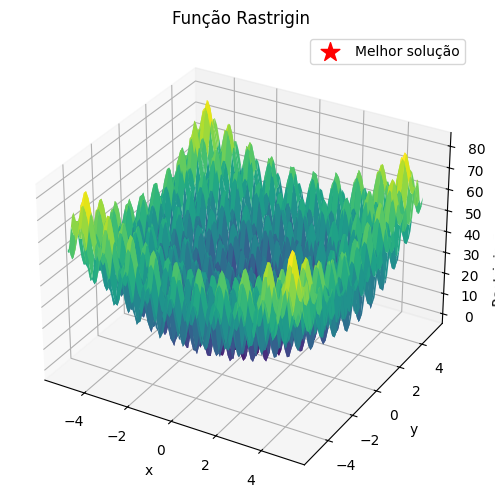

In [45]:
# Plotando o gráfico da função Rastrigin em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(best_x, best_y, rastrigin_function(best_x, best_y), color='red', marker='*', s=200, label='Melhor solução')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Rastrigin Function Value')
ax.set_title('Função Rastrigin')
plt.legend()
plt.show()

### Intervalo máximo

Ao adotar intervalos máximos na função de Rastrigin, os valores dos parâmetros que controlam a amplitude e a largura das oscilações na função são aumentados. Isso resulta em uma função de Rastrigin com oscilações mais amplas e variadas, criando um espaço de busca mais complexo.

Com um intervalo máximo na função de Rastrigin, as oscilações são mais acentuadas, o que pode dificultar a convergência de algoritmos de otimização para o mínimo global. Mais oscilações na função significam que os algoritmos enfrentam mais obstáculos durante a busca pela solução ótima, tornando o processo de otimização mais desafiador.

In [33]:
# Parâmetros do algoritmo genético
population_size = 100
chromosome_size = 35
max_generations = 50
crossover_rate = 0.8
mutation_rate = 0.05
elitism_rate = 0.75

x_min, x_max = -5.12, 5.12
y_min, y_max = -5.12, 5.12

# Inicialização da população
population = np.random.randint(2, size=(population_size, chromosome_size))

In [34]:
# Loop principal do algoritmo genético
for generation in range(max_generations):
    # Avaliação da população
    fitness_scores = np.array([calculate_fitness(individual) for individual in population])

    # Seleção dos pais
    selected_parents = [roulette_wheel_selection(population, fitness_scores) for _ in range(population_size)]

    # Cruzamento (crossover) e mutação
    offspring = []
    for i in range(0, population_size, 2):
        child1, child2 = crossover(selected_parents[i], selected_parents[i + 1], crossover_rate)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        offspring.append(child1)
        offspring.append(child2)

    # Elitismo
    elite_size = int(elitism_rate * population_size)
    elite_indices = np.argsort(fitness_scores)[::-1][:elite_size]
    elite = population[elite_indices]

    # Substituição da população
    population = np.vstack((elite, offspring[:population_size - elite_size]))

    # Mostrar o melhor fitness da geração atual
    best_fitness = np.max(fitness_scores)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness}")

Generation 1: Best Fitness = 3.491428295995005
Generation 2: Best Fitness = 3.491428295995005
Generation 3: Best Fitness = 3.491428295995005
Generation 4: Best Fitness = 3.491428295995005
Generation 5: Best Fitness = 3.491428295995005
Generation 6: Best Fitness = 3.491428295995005
Generation 7: Best Fitness = 3.491428295995005
Generation 8: Best Fitness = 3.491428295995005
Generation 9: Best Fitness = 3.491428295995005
Generation 10: Best Fitness = 3.491428295995005
Generation 11: Best Fitness = 3.491428295995005
Generation 12: Best Fitness = 3.491428295995005
Generation 13: Best Fitness = 3.491428295995005
Generation 14: Best Fitness = 3.491428295995005
Generation 15: Best Fitness = 3.491428295995005
Generation 16: Best Fitness = 3.491428295995005
Generation 17: Best Fitness = 6.494211436931549
Generation 18: Best Fitness = 6.33413139421446
Generation 19: Best Fitness = 6.323097942078347
Generation 20: Best Fitness = 6.323097942078347
Generation 21: Best Fitness = 6.323097942078347
Ge

In [35]:
# Avaliação final
final_fitness_scores = np.array([calculate_fitness(individual) for individual in population])
best_individual_index = np.argmax(final_fitness_scores)
best_individual = population[best_individual_index]
best_x = decode(best_individual[:chromosome_size // 2], x_min, x_max)
best_y = decode(best_individual[chromosome_size // 2:], y_min, y_max)
print("\nFinal Result:")
print(f"Melhor Indivíduo: {best_individual}")
print(f"Melhor Fitness: {final_fitness_scores[best_individual_index]}")
print(f"Melhor x: {best_x}")
print(f"Melhor y: {best_y}")


Final Result:
Melhor Indivíduo: [1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1]
Melhor Fitness: 8.058680295077142
Melhor x: -0.023945495189630073
Melhor y: 1.5281894233300148


In [36]:
# Melhor indivíduo encontrado
best_individual = population[best_individual_index]
best_x = decode(best_individual[:chromosome_size // 2], x_min, x_max)
best_y = decode(best_individual[chromosome_size // 2:], y_min, y_max)

# Criando uma grade de valores para x e y
x_values = np.linspace(x_min, x_max, 100)
y_values = np.linspace(y_min, y_max, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calculando os valores da função de Rastrigin para cada par de coordenadas (x, y)
Z = rastrigin_function(X, Y)

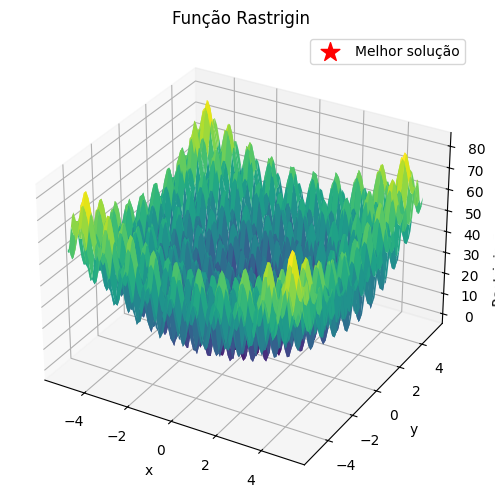

In [46]:
# Plotando o gráfico da função Rastrigin em 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(best_x, best_y, rastrigin_function(best_x, best_y), color='red', marker='*', s=200, label='Melhor solução')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Rastrigin Function Value')
ax.set_title('Função Rastrigin')
plt.legend()
plt.show()

# Desafio - Problema do Caixeiro Viajante

In [38]:
# Importação de bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt

In [48]:
class TravelingSalesmanGA:
    def __init__(self, cities, population_size=100, crossover_rate=0.8, mutation_rate=0.2, elitism_rate=0.1, max_generations=1000):
        self.cities = cities
        self.population_size = population_size
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.elitism_rate = elitism_rate
        self.max_generations = max_generations
        self.population = []
        self.best_solution = None
        self.best_fitness = float('inf')
        self.average_fitnesses = []
        self.best_fitnesses = []
        self.worst_fitnesses = []

    def initialize_population(self):
        self.population = [random.sample(self.cities, len(self.cities)) for _ in range(self.population_size)]

    def calculate_distance(self, route):
        distance = 0
        for i in range(len(route) - 1):
            distance += np.linalg.norm(np.array(route[i]) - np.array(route[i+1]))
        return distance

    def evaluate_population(self):
        fitnesses = []
        for individual in self.population:
            distance = self.calculate_distance(individual)
            fitnesses.append(distance)
            if distance < self.best_fitness:
                self.best_solution = individual
                self.best_fitness = distance
        return fitnesses

    def selection(self, fitnesses):
        selected_parents = []
        for _ in range(self.population_size):
            tournament_size = int(0.1 * self.population_size)
            candidates = random.sample(range(self.population_size), tournament_size)
            selected_parent = min(candidates, key=lambda x: fitnesses[x])
            selected_parents.append(self.population[selected_parent])
        return selected_parents

    def crossover(self, parents):
        if random.random() < self.crossover_rate:
            parent1, parent2 = random.sample(parents, 2)
            child = [None] * len(parent1)
            start, end = sorted(random.sample(range(len(parent1)), 2))
            child[start:end] = parent1[start:end]
            remaining = [gene for gene in parent2 if gene not in child]
            idx = 0
            for i in range(len(child)):
                if child[i] is None:
                    child[i] = remaining[idx]
                    idx += 1
            return child
        else:
            return random.choice(parents)

    def mutate(self, individual):
        if random.random() < self.mutation_rate:
            idx1, idx2 = random.sample(range(len(individual)), 2)
            individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
        return individual

    def elitism(self, selected_parents, fitnesses):
        sorted_parents = [x for _, x in sorted(zip(fitnesses, selected_parents))]
        elite_count = int(self.elitism_rate * self.population_size)
        elite = sorted_parents[:elite_count]
        return elite

    def evolve(self):
        self.initialize_population()
        for generation in range(self.max_generations):
            fitnesses = self.evaluate_population()
            selected_parents = self.selection(fitnesses)
            elite = self.elitism(selected_parents, fitnesses)
            offspring = elite.copy()
            while len(offspring) < self.population_size:
                parents = random.choices(selected_parents, k=2)
                child = self.crossover(parents)
                child = self.mutate(child)
                offspring.append(child)
            self.population = offspring
            self.average_fitnesses.append(np.mean(fitnesses))
            self.best_fitnesses.append(min(fitnesses))
            self.worst_fitnesses.append(max(fitnesses))

    def plot_fitness_curves(self):
        plt.plot(range(self.max_generations), self.average_fitnesses, label='Fitness médio')
        plt.plot(range(self.max_generations), self.best_fitnesses, label='Melhor Fitness')
        plt.plot(range(self.max_generations), self.worst_fitnesses, label='Pior Fitness')
        plt.xlabel('Geração')
        plt.ylabel('Fitness')
        plt.title('Curvas de Fitness')
        plt.legend()
        plt.show()

    def print_best_solution(self):
        print("Melhor solução:", self.best_solution)
        print("Melhor Fitness:", self.best_fitness)

Melhor solução: [(20.586320738919433, -31.108515410377127), (20.911189167882874, -23.408159862906928), (14.549973883401314, -26.069977774179364), (14.606437385690477, -25.551739164735515), (3.522156003578054, -1.9494414105852016), (-3.508920625548761, 3.756383712666697), (-6.719701006623872, 10.53047519490137), (-16.889761616721778, 28.55210140914091), (-16.219924332691626, 29.28223339916802), (-17.893319745118177, 33.18317316273179), (-22.919669676825542, 26.207325828735996), (-32.77809282998837, 27.382058934276394), (-32.08227518807065, -12.238974240085774), (-34.128706679072636, -22.172313774734093), (-18.57132854040657, -17.127567911180392), (19.542225764891782, 20.2571666695139), (8.686111493681622, 11.642243225854465), (11.400278840506246, 14.064390126390357), (-12.728446289100084, -27.215278891093362), (27.690655266607614, 15.490125717585705)]
Melhor Fitness: 247.66307022235668


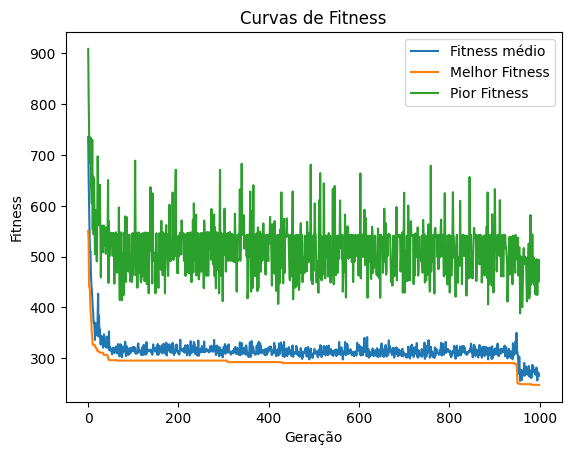

In [49]:
# Exemplo de uso:
cities = [(random.uniform(-35, 35), random.uniform(-35, 35)) for _ in range(20)]
ga = TravelingSalesmanGA(cities)
ga.evolve()
ga.print_best_solution()
ga.plot_fitness_curves()